# Para este proyecto, busco extraer los datos del producto y del precio del mismo de la pagina web de Disco:
https://www.disco.com.ar/

## 00 - Instalar librerias necesarias:

* Scrapy: para definir "arañas" (spiders) que navegan por sitios web y extraen información estructurad
* Datetime: para definir fecha y hora

In [2]:
## 00 - Instalar librerias:
!pip install scrapy
!pip install datetime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 4.6 MB/s eta 0:00:00


## 01 -  Importar las librerias necesarias:

* scrapy: para seleccionar elementos HTML con selectores CSS
* datetime: para manejar las fechas y horas
* pytz: para trabajar con zonas horarias
* google.colab.files: para subir o descargar archivos desde colab a la computadora

In [3]:
import scrapy
from datetime import datetime
import pytz
from google.colab import files

## 02 -  Desarrollar y guardar el script en el archivo disco.py

Se define la araña web y una lista de URLs que corresponden a productos del supermercado Disco. Asi mismo, se define la funcion parse, que procesa cada pagina.

Usare la etiqueta meta [property="product:price:amount"] para extraer el precio

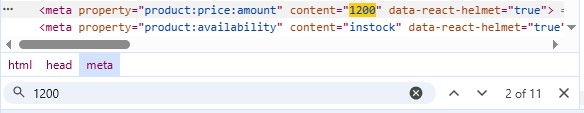

In [19]:
%%writefile disco.py

# 01 importo las librerias necesarias
import scrapy
from scrapy.cmdline import execute
from datetime import datetime
import pytz

# 02 Configuro la fecha actual
zona_arg = pytz.timezone('America/Argentina/Buenos_Aires')

hora = datetime.now(zona_arg).time()
fecha = datetime.now().today()

# 03 Formato correcto para la fecha y hora
fHoraMinuto = "%H:%M"
fDiaMesAño = "%d-%m-%Y"

horaActual = hora.strftime(fHoraMinuto)
fechaActual = fecha.strftime(fDiaMesAño)

# 04 Configuro la araña:
class ProductosSpider(scrapy.Spider):
  name = 'Canasta'
  start_urls = [
      "https://www.disco.com.ar/galletitas-de-agua-criollitas-originales-300-gr/p",
      "https://www.disco.com.ar/galletitas-surtido-bagley-400-gr-2/p",
      "https://www.disco.com.ar/arroz-grano-largo-fino-dos-hermanos-1-kg/p",
      "https://www.disco.com.ar/harina-000-vit-x-1-kg-favorita/p",
      "https://www.disco.com.ar/papa-cepillada-granel-por-kg/p",
      "https://www.disco.com.ar/batata-por-kg/p",
      "https://www.disco.com.ar/azucar-ledesma-x-1kg/p",
      "https://www.disco.com.ar/dulce-de-leche-la-serenisima-clasico-400g-2/p",
      "https://www.disco.com.ar/cebolla-superior-por-kg/p",
      "https://www.disco.com.ar/manzana-roja-por-kg-2/p",
      "https://www.disco.com.ar/pollo-fresco-con-menudos-2/p",
      "https://www.disco.com.ar/salame-milan-campo-austral-feteado-x-150-gr/p",
      "https://www.disco.com.ar/huevos-color-6-un-maxima-mp-2/p",
      "https://www.disco.com.ar/leche-entera-la-serenisima-3sachet-1lt/p",
      "https://www.disco.com.ar/queso-crema-casancrem-clasico-290-gr/p",
      "https://www.disco.com.ar/yogur-bebible-entero-la-serenisima-vainilla-900-gr/p",
      "https://www.disco.com.ar/manteca-la-serenisima-100-gr/p",
      "https://www.disco.com.ar/aceite-de-girasol-natura-1-5-l/p",
      "https://www.disco.com.ar/gaseosa-coca-cola-sabor-original-2-25-l/p",
      "https://www.disco.com.ar/cerveza-quilmes-stout-1lt/p",
      "https://www.disco.com.ar/sal-fina-celusal-500-gr/p",
      "https://www.disco.com.ar/vinagre-de-vino-cuisine-and-co-500-ml/p",
      "https://www.disco.com.ar/cafe-molido-cabrales-250-gr/p",
      "https://www.disco.com.ar/yerba-mate-sin-tacc-chamigo-1-kg/p",
      "https://www.disco.com.ar/aderezo-mayonesa-natura-237-gr/p"
  ]

# 05 Configuro la funcion Parse:
  def parse(self, response):
    nombre_producto = response.css('span.vtex-store-components-3-x-productBrand::text').get()
    precio_web = response.css('meta[property="product:price:amount"]::attr(content)').get()

    if precio_web:
      precio = precio_web
    else:
      precio = "No disponible"

    yield {
        "fecha" : fechaActual,
        "hora" : horaActual,
        "Nombre Producto": nombre_producto,
        "Precio" : precio,
        "URL" : response.url
    }

Overwriting disco.py


## 03 - Ejecutar el scrapper
Se ejecuta el scraper en el archivo hiper_libertad.py y guarda los resultados en un archivo CSV, llamado relevamiento_precios_hiper_libertad.csv.

In [20]:
# Ejecutar:
!scrapy runspider disco.py -o relevamiento_precios_disco.csv

2025-04-13 16:38:57 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: scrapybot)
2025-04-13 16:38:57 [scrapy.utils.log] INFO: Versions: lxml 5.3.1.0, libxml2 2.12.9, cssselect 1.3.0, parsel 1.10.0, w3lib 2.3.1, Twisted 24.11.0, Python 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0], pyOpenSSL 24.2.1 (OpenSSL 3.3.2 3 Sep 2024), cryptography 43.0.3, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2025-04-13 16:38:57 [scrapy.addons] INFO: Enabled addons:
[]
2025-04-13 16:38:57 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2025-04-13 16:38:57 [scrapy.extensions.telnet] INFO: Telnet Password: fbaedba7c87e44fe
2025-04-13 16:38:57 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.logstats.LogStats']
2025-04-13 16:38:57 [scrapy.crawler] INFO: Overridden settings:
{'S

## 04 - Descargar el archivo a la PC:

In [21]:
files.download('relevamiento_precios_disco.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>